# Visualization of nucleotide embeddings produced by SpliceBERT

In [1]:
import os
import sys
import json
import scanpy as sc
import pickle
import gzip
import h5py
from glob import glob
from tqdm import tqdm
import numpy as np
from importlib import reload
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
new_rc_params = {'text.usetex': False, 'svg.fonttype': 'none' }
plt.rcParams.update(new_rc_params)
sys.path.append("../scripts")
from utils import set_spines, get_figure_size

In [2]:
np.random.seed(2023)

In [3]:
## run script to generate data for visualization
#! export CUDA_VISIBLE_DEVICES=0 && ./pipeline.sh

## compare different methods  
(The last layer hidden states are used in this section)  

In [4]:
splicebert_ss = sc.read_h5ad("./output/hg19.ss-motif.for_umap.SpliceBERT.L4.h5ad")
splicebert_human_ss = sc.read_h5ad("./output/hg19.ss-motif.for_umap.SpliceBERT-human.L6.h5ad")
dnabert_ss = dict()
for k in [3, 4, 5, 6]:
    dnabert_ss[k] = sc.read_h5ad(f"./output/hg19.ss-motif.for_umap.DNABERT{k}.L12.h5ad")
onehot_ss = dict()
for k in [10, 20, 50, 100, 200]:
    onehot_ss[k] = sc.read_h5ad(f"./output/hg19.ss-motif.for_umap.onehot.flanking{k}.h5ad")

splicebert_sse = sc.read_h5ad("./output/K562.SSE.hg38.for_visualization.SpliceBERT.L6.h5ad")
splicebert_human_sse = sc.read_h5ad("./output/K562.SSE.hg38.for_visualization.SpliceBERT-human.L6.h5ad")
dnabert_sse = dict()
for k in [3, 4, 5, 6]:
    dnabert_sse[k] = sc.read_h5ad(f"./output/K562.SSE.hg38.for_visualization.DNABERT{k}.L12.h5ad")
onehot_sse = dict()
for k in [10, 20, 50, 100, 200]:
    onehot_sse[k] = sc.read_h5ad(f"./output/K562.SSE.hg38.for_visualization.onehot.flanking{k}.h5ad")

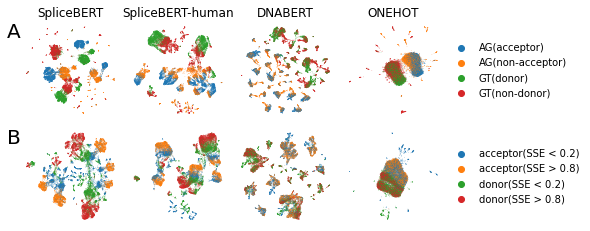

In [5]:
## compare SpliceBERT with SpliceBERT-human
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=get_figure_size(1, 0.4))

args = dict(show=False, legend_loc=None, s=1)
loc = (-0.01, 1)

ax = axs[0, 0]
# add figure index (A/B/C)
ax.text(*loc, "A", transform=ax.transAxes, fontsize=20, fontweight='normal', va='top', ha='right')
sc.pl.umap(splicebert_ss, color=["label"], ax=ax, title="SpliceBERT", **args)
ax.set_xlabel("")
ax.set_ylabel("")
set_spines(ax=ax, bottom=False, left=False)
# ax.set_aspect("equal")

ax = axs[0, 1]
sc.pl.umap(splicebert_human_ss, color=["label"], ax=ax, title="SpliceBERT-human", **args)
ax.set_xlabel("")
ax.set_ylabel("")
set_spines(ax=ax, bottom=False, left=False)
# ax.set_aspect("equal")

ax = axs[0, 2]
sc.pl.umap(dnabert_ss[3], color=["label"], ax=ax, title="DNABERT", **args)
ax.set_xlabel("")
ax.set_ylabel("")
set_spines(ax=ax, bottom=False, left=False)
# ax.set_aspect("equal")

ax = axs[0, 3]
args["legend_loc"] = "right margin"
sc.pl.umap(onehot_ss[100], color=["label"], ax=ax, title="ONEHOT", **args)
ax.set_xlabel("")
ax.set_ylabel("")
set_spines(ax=ax, bottom=False, left=False)
# ax.set_aspect("equal")

args = dict(show=False, legend_loc=None, s=1, title="")
ax = axs[1, 0]
ax.text(*loc, "B", transform=ax.transAxes, fontsize=20, fontweight='normal', va='top', ha='right')
sc.pl.umap(splicebert_sse, color=["label"], ax=ax, **args)
ax.set_xlabel("")
ax.set_ylabel("")
set_spines(ax=ax, bottom=False, left=False)
# ax.set_aspect("equal")

ax = axs[1, 1]
sc.pl.umap(splicebert_human_sse, color=["label"], ax=ax, **args)
ax.set_xlabel("")
ax.set_ylabel("")
set_spines(ax=ax, bottom=False, left=False)
# ax.set_aspect("equal")

ax = axs[1, 2]
sc.pl.umap(dnabert_sse[3], color=["label"], ax=ax, **args)
ax.set_xlabel("")
ax.set_ylabel("")
set_spines(ax=ax, bottom=False, left=False)
# ax.set_aspect("equal")

ax = axs[1, 3]
args["legend_loc"] = "right margin"
sc.pl.umap(onehot_sse[100], color=["label"], ax=ax, **args)
ax.set_xlabel("")
ax.set_ylabel("")
set_spines(ax=ax, bottom=False, left=False)
# ax.set_aspect("equal")



plt.tight_layout()
plt.savefig("Figure_3.jpg", dpi=600, bbox_inches="tight")
plt.show()

## Supplementary figures

In [6]:
# compare SpliceBERT embedding per layer
splicebert_gt = dict()
splicebert_ag = dict()
for l in range(1, 7):
    splicebert_gt[l] = sc.read_h5ad(f"./output/hg19.ss-motif.for_umap.SpliceBERT.L{l}.GT.h5ad")
    splicebert_ag[l] = sc.read_h5ad(f"./output/hg19.ss-motif.for_umap.SpliceBERT.L{l}.AG.h5ad")

In [7]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score

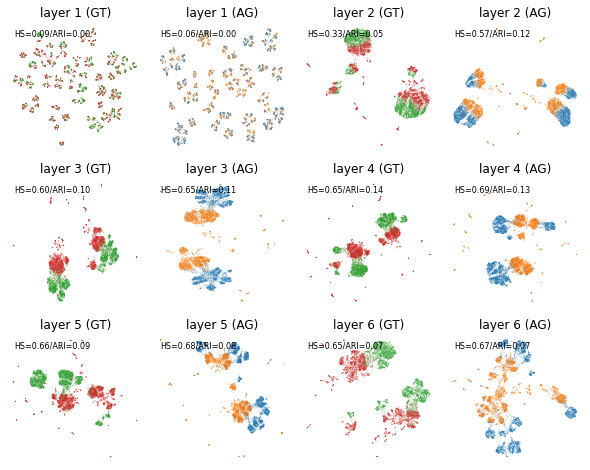

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=get_figure_size(1, 0.8))
for i, l in enumerate([1, 2, 3, 4, 5, 6]):
    ax = axs[(i * 2) // 4, (i * 2) % 4]
    sc.pl.umap(splicebert_gt[l], color=["label"], ax=ax, title=f"layer {l} (GT)", show=False, legend_loc=None, s=1, palette={"GT(donor)": "tab:green", "GT(non-donor)": "tab:red"})
    ax.set_xlabel("")
    ax.set_ylabel("")
    set_spines(ax=ax, bottom=False, left=False)
    hs = homogeneity_score(splicebert_gt[l].obs["label"], splicebert_gt[l].obs["leiden"])
    ari = adjusted_rand_score(splicebert_gt[l].obs["label"], splicebert_gt[l].obs["leiden"])
    ax.text(0.05, 0.95, f"HS={hs:.2f}/ARI={ari:.2f}", transform=ax.transAxes, va="top", ha="left", fontsize=8)

    ax = axs[(i * 2) // 4, (i * 2) % 4 + 1]
    sc.pl.umap(splicebert_ag[l], color=["label"], ax=ax, title=f"layer {l} (AG)", show=False, legend_loc=None, s=1)
    ax.set_xlabel("")
    ax.set_ylabel("")
    set_spines(ax=ax, bottom=False, left=False)
    hs = homogeneity_score(splicebert_ag[l].obs["label"], splicebert_ag[l].obs["leiden"])
    ari = adjusted_rand_score(splicebert_ag[l].obs["label"], splicebert_ag[l].obs["leiden"])
    ax.text(0.05, 0.95, f"HS={hs:.2f}/ARI={ari:.2f}", transform=ax.transAxes, va="top", ha="left", fontsize=8)

plt.tight_layout()
plt.savefig("Figure_S_SpliceBERT-layer.jpg", dpi=600, bbox_inches="tight")
plt.show()

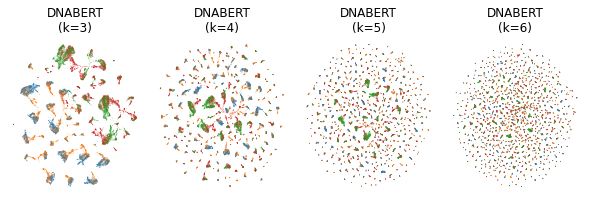

In [9]:
# compare DNABERT with different token length
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=get_figure_size(1, 0.35))
size = 1
for k in range(3, 7):
    ax = axs[k-3]
    sc.pl.umap(dnabert_ss[k], color=["label"], ax=ax, title=f"DNABERT\n(k={k})", show=False, legend_loc=None, s=size)
    set_spines(ax=ax, bottom=False, left=False)
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()
plt.savefig("Figure_S_dnabert.jpg", dpi=600, bbox_inches="tight")
plt.show()

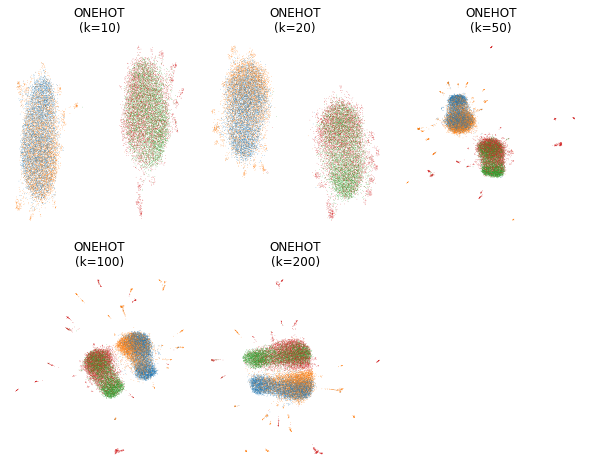

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=get_figure_size(1, 0.8))
for i, k in enumerate([10, 20, 50, 100, 200, None]):
    ax = axs[i//3, i%3]
    if k is not None:
        sc.pl.umap(onehot_ss[k], color=["label"], ax=ax, title=f"ONEHOT\n(k={k})", show=False, legend_loc=None, s=size)
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])

    set_spines(ax=ax, bottom=False, left=False)
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()
plt.savefig("Figure_S_onehot.jpg", dpi=600, bbox_inches="tight")
plt.show()